# Project - Credit Modeling (Lending Club)

Credit modeling focuses on modeling a borrower's [credit risk](https://en.wikipedia.org/wiki/Credit_risk). Credit has played a key role in the economy for centuries and some form of credit has existed since the beginning of commerce. 

We'll be working with financial lending data from [Lending Club](https://www.lendingclub.com/). Lending Club is a marketplace for personal loans that pairs borrowers who are seeking a loan with investors looking to lend money and make a return.

Each borrower completes a comprehensive application, providing their past financial history, the reason for the loan, and more. Lending Club evaluates each borrower's credit score using past historical data and their own data science process to assign an interest rate to the borrower. The interest rate is the percentage in addition to the requested loan amount that the borrower has to pay back. Lending Club also tries to verify all the information the borrower provides but it can't verify all of the information (usually for regulation reasons).

A higher interest rate means that the borrower is a risk and more unlikely to pay back the loan. While a lower interest rate means that the borrower has a good credit history and is more likely to pay back the loan. The interest rates range from 5.32% to 30.99% and each borrower is given a [grade](https://www.lendingclub.com/investing/investor-education/interest-rates-and-fees) according to the interest rate they were assigned. If the borrower accepts the interest rate, then the loan is listed on the Lending Club marketplace.

Investors are primarily interested in receiving a return on their investments. Approved loans are listed on the Lending Club website, where qualified investors can browse recently approved loans, the borrower's credit score, the purpose for the loan, and other information from the application. Once they're ready to back a loan, they select the amount of money they want to fund. Once a loan's requested amount is fully funded, the borrower receives the money they requested minus the [origination fee](https://help.lendingclub.com/hc/en-us/articles/214463677-Rates-and-fees-for-personal-loans) that Lending Club charges.

The borrower will make monthly payments back to Lending Club either over 36 months or over 60 months. Lending Club redistributes these payments to the investors. This means that investors don't have to wait until the full amount is paid off before they see a return in money. If a loan is fully paid off on time, the investors make a return which corresponds to the interest rate the borrower had to pay in addition to the requested amount. Many loans aren't completely paid off on time and some borrowers [default](https://help.lendingclub.com/hc/en-us/articles/215488038-What-do-the-different-Note-statuses-mean-) on the loan.

__Project's Objective:__
- __Build a machine learning model that can accurately predict if a borrower will pay off their loan on time or not.__

Most investors use a portfolio strategy to invest small amounts in many loans, with healthy mixes of low, medium, and interest loans. __In this project, we'll focus on the mindset of a conservative investor who only wants to invest in the loans that have a good chance of being paid off on time.__ To do that, we'll need to first understand the features in the dataset and then experiment with building machine learning models that reliably predict if a loan will be paid off or not.

### Introduction to the Data

I will use the dataset and data dictionary (`LoanStats.html`) provided by Dataquest. The latter downloaded it from the Lending Club website.

The dataset contains approved loans data from 2007 to 2011.

Before we can start doing machine learning, we need to define what features we want to use and which column represents the target column we want to predict. Let's start by reading and exploring the dataset.

In [1]:
import pandas as pd

loans = pd.read_csv("loans_2007.csv", low_memory=False)

loans.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42538 entries, 0 to 42537
Data columns (total 52 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          42538 non-null  object 
 1   member_id                   42535 non-null  float64
 2   loan_amnt                   42535 non-null  float64
 3   funded_amnt                 42535 non-null  float64
 4   funded_amnt_inv             42535 non-null  float64
 5   term                        42535 non-null  object 
 6   int_rate                    42535 non-null  object 
 7   installment                 42535 non-null  float64
 8   grade                       42535 non-null  object 
 9   sub_grade                   42535 non-null  object 
 10  emp_title                   39909 non-null  object 
 11  emp_length                  41423 non-null  object 
 12  home_ownership              42535 non-null  object 
 13  annual_inc                  425

In [2]:
loans.isnull().sum().sort_values()

id                               0
addr_state                       3
dti                              3
application_type                 3
policy_code                      3
last_pymnt_amnt                  3
collection_recovery_fee          3
zip_code                         3
revol_bal                        3
total_rec_late_fee               3
initial_list_status              3
out_prncp                        3
out_prncp_inv                    3
total_pymnt                      3
total_pymnt_inv                  3
recoveries                       3
total_rec_prncp                  3
purpose                          3
loan_status                      3
member_id                        3
loan_amnt                        3
funded_amnt                      3
funded_amnt_inv                  3
term                             3
int_rate                         3
installment                      3
grade                            3
sub_grade                        3
home_ownership      

In [3]:
nulls_count = loans.isnull().sum().sort_values()

nulls_count_df = pd.DataFrame(nulls_count, columns=["null_count"])

nulls_count_df['null_count_percentage'] = ( nulls_count_df['null_count'] / loans.shape[0] ) * 100

print( nulls_count_df )


                            null_count  null_count_percentage
id                                   0               0.000000
addr_state                           3               0.007053
dti                                  3               0.007053
application_type                     3               0.007053
policy_code                          3               0.007053
last_pymnt_amnt                      3               0.007053
collection_recovery_fee              3               0.007053
zip_code                             3               0.007053
revol_bal                            3               0.007053
total_rec_late_fee                   3               0.007053
initial_list_status                  3               0.007053
out_prncp                            3               0.007053
out_prncp_inv                        3               0.007053
total_pymnt                          3               0.007053
total_pymnt_inv                      3               0.007053
recoveri

In [4]:
dup_bool = loans.duplicated()

print( sum(dup_bool) )


0


In [5]:
pd.options.display.max_columns = 100  # Avoid having displayed truncated output

loans.head()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,3.0,0.0,13648.0,83.7%,9.0,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-2015,171.62,Jun-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,3.0,0.0,1687.0,9.4%,4.0,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,Sep-2013,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,2.0,0.0,2956.0,98.5%,10.0,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-2014,649.91,Jun-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
3,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,10.0,0.0,5598.0,21%,37.0,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-2015,357.48,Apr-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
4,1075358,1311748.0,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,n,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,15.0,0.0,27783.0,53.9%,38.0,f,461.73,461.73,3581.120000,3581.12,2538.27,1042.85,0.00,0.00,0.00,Jun-2016,67.79,Jun-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0


### Now,
Let's analyze each feature (column) and determine if it:

- discloses/leaks information from the future (after the loan has already been funded)


- requires more data or a lot of processing to turn it into a useful feature


- contains redundant information


- needs to be cleaned up and formatted

Keep in mind that we need to select one of the features as the __target column__.

In [6]:
i = 0
for col in loans.columns:
    
    unique_values = loans[col].unique()
    unique_cnt = len(unique_values)
    
    print( i, ">>>", col, "(", unique_cnt, ",", loans[col].dtype, ")" )
    
    i += 1
    
    if unique_cnt < 20:
        print( "\t", unique_values, "\n\n" )
        
    else:
        j = 1
        print( "\t Some values are:" )
        string = "\t"
        for val in unique_values:
            string += "'{}', ".format(val)
            j += 1
            if j == 11:
                print( string, "\n\n" )
                break



0 >>> id ( 42538 , object )
	 Some values are:
	'1077501', '1077430', '1077175', '1076863', '1075358', '1075269', '1069639', '1072053', '1071795', '1071570',  


1 >>> member_id ( 42536 , float64 )
	 Some values are:
	'1296599.0', '1314167.0', '1313524.0', '1277178.0', '1311748.0', '1311441.0', '1304742.0', '1288686.0', '1306957.0', '1306721.0',  


2 >>> loan_amnt ( 899 , float64 )
	 Some values are:
	'5000.0', '2500.0', '2400.0', '10000.0', '3000.0', '7000.0', '5600.0', '5375.0', '6500.0', '12000.0',  


3 >>> funded_amnt ( 1052 , float64 )
	 Some values are:
	'5000.0', '2500.0', '2400.0', '10000.0', '3000.0', '7000.0', '5600.0', '5375.0', '6500.0', '12000.0',  


4 >>> funded_amnt_inv ( 9247 , float64 )
	 Some values are:
	'4975.0', '2500.0', '2400.0', '10000.0', '3000.0', '5000.0', '7000.0', '5600.0', '5350.0', '6500.0',  


5 >>> term ( 3 , object )
	 [' 36 months' ' 60 months' nan] 


6 >>> int_rate ( 395 , object )
	 Some values are:
	' 10.65%', ' 15.27%', ' 15.96%', ' 13.49%', 

### Features (Columns) Removal

I will remove the following features (columns) because they don't affect a borrower's ability to pay back a loan:

- `id`


- `member_id`

I will remove the following features because they contain only __1__ unique value (low variance feature). This means that the column isn't informative and isn't going to help the model to make better predictions.

- `initial_list_status`


- `collections_12_mths_ex_med`


- `policy_code`


- `application_type`


- `chargeoff_within_12_mths`

I will remove the following features because they require more data or a lot of processing to turn them into useful features:

- `emp_title`


- `title`

#### > `emp_title`:
As we can see below, this column contains a very large number of unique values (30,658 which represent the 72% of the column values) and has data quality issues since some of the values are repeated with slight modifications (e.g. `USAF`, `US Air Force`, `United States Air Force`; `JP Morgan Chase`, `JPMorgan Chase`; `US Army`, `U.S. Army`).

In [7]:
loans['emp_title'].describe()

count       39909
unique      30658
top       US Army
freq          139
Name: emp_title, dtype: object

In [8]:
loans.shape

(42538, 52)

In [9]:
loans['emp_title'].value_counts(dropna=False)

NaN                                 2629
US Army                              139
Bank of America                      115
IBM                                   72
Kaiser Permanente                     61
                                    ... 
Regional Elite Airlines Services       1
Mass General Medical Group             1
Kontera                                1
Southeast Georgia Health ystem         1
Homemaker                              1
Name: emp_title, Length: 30659, dtype: int64

In [10]:
loans['emp_title'].value_counts(dropna=False, normalize=True) * 100

NaN                                 6.180356
US Army                             0.326767
Bank of America                     0.270347
IBM                                 0.169260
Kaiser Permanente                   0.143401
                                      ...   
Regional Elite Airlines Services    0.002351
Mass General Medical Group          0.002351
Kontera                             0.002351
Southeast Georgia Health ystem      0.002351
Homemaker                           0.002351
Name: emp_title, Length: 30659, dtype: float64

In [11]:
loans['emp_title'].value_counts(dropna=False).head(25)

NaN                        2629
US Army                     139
Bank of America             115
IBM                          72
Kaiser Permanente            61
AT&T                         61
UPS                          58
Wells Fargo                  57
USAF                         56
US Air Force                 55
Self Employed                49
United States Air Force      48
Walmart                      47
Lockheed Martin              46
State of California          45
Verizon Wireless             43
U.S. Army                    42
Walgreens                    41
USPS                         41
US ARMY                      40
Self                         39
Best Buy                     38
JPMorgan Chase               38
Target                       38
JP Morgan Chase              38
Name: emp_title, dtype: int64

#### > `title`:
As we can see below, this column contains a large number of unique values (21,264 which represent the 50% of the column values) and has data quality issues since some of the values are repeated with slight modifications (e.g. `Debt Consolidation`, `Debt Consolidation Loan`, `debt consolidation`, `debt_consolidation`).

Also, the `title` and `purpose` columns contain very similar information. The `purpose` column only contains 15 unique values. Therefore, I will remove the `title` column and keep the `purpose` column.

In [12]:
loans['title'].describe()

count                  42522
unique                 21264
top       Debt Consolidation
freq                    2259
Name: title, dtype: object

In [13]:
loans['title'].isnull().sum()

16

In [14]:
loans['title'].value_counts(dropna=False)

Debt Consolidation                  2259
Debt Consolidation Loan             1760
Personal Loan                        708
Consolidation                        547
debt consolidation                   532
                                    ... 
CitiCard PayOff                        1
Taxes Loan                             1
Blazing in 5 years                     1
I was scammed and now recovering       1
Aroundthehouse                         1
Name: title, Length: 21265, dtype: int64

In [15]:
loans['title'].value_counts(dropna=False, normalize=True) * 100

Debt Consolidation                  5.310546
Debt Consolidation Loan             4.137477
Personal Loan                       1.664394
Consolidation                       1.285909
debt consolidation                  1.250646
                                      ...   
CitiCard PayOff                     0.002351
Taxes Loan                          0.002351
Blazing in 5 years                  0.002351
I was scammed and now recovering    0.002351
Aroundthehouse                      0.002351
Name: title, Length: 21265, dtype: float64

In [16]:
loans['title'].value_counts(dropna=False).head(50)

Debt Consolidation                2259
Debt Consolidation Loan           1760
Personal Loan                      708
Consolidation                      547
debt consolidation                 532
Home Improvement                   373
Credit Card Consolidation          370
Debt consolidation                 347
Small Business Loan                333
Personal                           330
Credit Card Loan                   323
personal loan                      266
Consolidation Loan                 264
Home Improvement Loan              255
personal                           247
Loan                               218
consolidation                      217
Wedding Loan                       217
Car Loan                           206
Other Loan                         192
Credit Card Payoff                 164
Wedding                            160
Credit Card Refinance              147
Major Purchase Loan                146
Consolidate                        141
Medical                  

In [17]:
loans['purpose'].unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational', nan], dtype=object)

I will remove the following features because they leak information from the future, meaning that they're describing aspects of the loan after it's already been fully funded and started to be paid off by the borrower.

- `funded_amt`, `funded_amnt_inv`, `issue_d`, `out_prncp`, `out_prncp_inv`, `total_pymnt`, `total_pymnt_inv`, `total_rec_prncp`, `total_rec_int`, `total_rec_late_fee`, `recoveries`, `collection_recovery_fee`, `last_pymnt_d`, `last_pymnt_amnt`

I will remove the following features because they contain redundant information.

- `grade`


- `sub_grade`


- `zip_code`

#### > `grade` and `sub_grade`:
These two columns are based on the borrower's interest rate (`int_rate` column). I prefer to use `int_rate` which contains continuous values than `grade` and `sub_grade` which values are categorical. Continuous values are better suited for machine learning.

> "Continuous values are better suited for machine learning":
No es completamente cierto. Depende del modelo que vas a utilizar


*** Pending

In [18]:
loans[['grade', 'sub_grade', 'int_rate']].sample(30).sort_values( by=['grade', 'sub_grade'] )

,grade,sub_grade,int_rate
36922,A,A3,8.00%
19092,A,A3,6.92%
26307,A,A3,7.14%
4566,A,A4,7.90%
7050,A,A4,7.90%
15292,A,A5,8.49%
3958,B,B1,9.91%
6652,B,B2,10.65%
18326,B,B2,10.00%
3641,B,B2,10.65%


In [19]:
tmp_1 = loans[['grade', 'sub_grade', 'int_rate']].copy()

tmp_1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42538 entries, 0 to 42537
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   grade      42535 non-null  object
 1   sub_grade  42535 non-null  object
 2   int_rate   42535 non-null  object
dtypes: object(3)
memory usage: 997.1+ KB


In [20]:
tmp_1['int_rate'] = tmp_1['int_rate'].str.rstrip("%").astype("float")


In [21]:
tmp_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42538 entries, 0 to 42537
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   grade      42535 non-null  object 
 1   sub_grade  42535 non-null  object 
 2   int_rate   42535 non-null  float64
dtypes: float64(1), object(2)
memory usage: 997.1+ KB


In [22]:
tmp_1['grade'].unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G', nan], dtype=object)

In [23]:
tmp_1['grade'].value_counts(dropna=False).sort_index()

A      10183
B      12389
C       8740
D       6016
E       3394
F       1301
G        512
NaN        3
Name: grade, dtype: int64

In [24]:
import numpy as np

grades = list( tmp_1['grade'].unique() )

grades.remove(np.nan)

grades.sort()


for grade in grades:
    
    grade_bool = tmp_1['grade'] == grade
    
    print( ">> Grade:", grade )
    
    print( " - Sub-grades:", tmp_1[grade_bool]['sub_grade'].unique() )
    
    print( " - Interest Rate info:\n", tmp_1[grade_bool]['int_rate'].describe(), "\n" )


>> Grade: A
 - Sub-grades: ['A4' 'A1' 'A3' 'A5' 'A2']
 - Interest Rate info:
 count    10183.000000
mean         7.342708
std          1.032999
min          5.420000
25%          6.620000
50%          7.490000
75%          7.900000
max          9.630000
Name: int_rate, dtype: float64 

>> Grade: B
 - Sub-grades: ['B2' 'B5' 'B1' 'B3' 'B4']
 - Interest Rate info:
 count    12389.000000
mean        11.014209
std          0.905096
min          6.000000
25%         10.370000
50%         10.990000
75%         11.710000
max         12.690000
Name: int_rate, dtype: float64 

>> Grade: C
 - Sub-grades: ['C4' 'C5' 'C1' 'C3' 'C2']
 - Interest Rate info:
 count    8740.000000
mean       13.499889
std         0.972367
min         6.000000
25%        12.990000
50%        13.490000
75%        13.990000
max        16.110000
Name: int_rate, dtype: float64 

>> Grade: D
 - Sub-grades: ['D1' 'D2' 'D5' 'D3' 'D4']
 - Interest Rate info:
 count    6016.000000
mean       15.577149
std         1.242256
min   

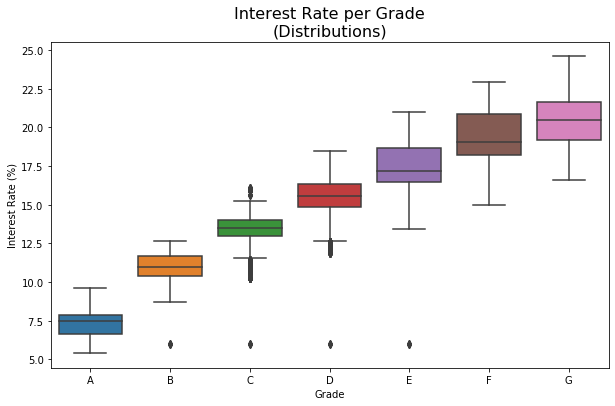

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(10,6))

sns.boxplot( ax = ax, x = 'grade', y = 'int_rate', data = tmp_1, \
             order=['A', 'B', 'C', 'D', 'E', 'F', 'G'] )


plt.title('Interest Rate per Grade\n(Distributions)', fontsize = 16)

plt.ylabel('Interest Rate (%)')

plt.xlabel('Grade')

plt.show()


#### > `zip_code`:
This column is redundant with the `addr_state` column since only the first 3 digits of the 5-digit zip code are visible which can only be used to identify the state the borrower lives in.

In [26]:
loans['zip_code'].head()

0    860xx
1    309xx
2    606xx
3    917xx
4    972xx
Name: zip_code, dtype: object

In [27]:
loans['addr_state'].head()

0    AZ
1    GA
2    IL
3    CA
4    OR
Name: addr_state, dtype: object

Let's proceed to drop the columns:

In [28]:
loans.drop( columns=["id", "member_id", "initial_list_status", "collections_12_mths_ex_med", \
                     "policy_code", "application_type", "chargeoff_within_12_mths", \
                     "emp_title", "title", "funded_amnt", "funded_amnt_inv", "issue_d", \
                     "out_prncp", "out_prncp_inv", "total_pymnt", "total_pymnt_inv", \
                     "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", \
                     "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt", "grade", \
                     "sub_grade", "zip_code"], inplace=True )


In [29]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42538 entries, 0 to 42537
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             42535 non-null  float64
 1   term                  42535 non-null  object 
 2   int_rate              42535 non-null  object 
 3   installment           42535 non-null  float64
 4   emp_length            41423 non-null  object 
 5   home_ownership        42535 non-null  object 
 6   annual_inc            42531 non-null  float64
 7   verification_status   42535 non-null  object 
 8   loan_status           42535 non-null  object 
 9   pymnt_plan            42535 non-null  object 
 10  purpose               42535 non-null  object 
 11  addr_state            42535 non-null  object 
 12  dti                   42535 non-null  float64
 13  delinq_2yrs           42506 non-null  float64
 14  earliest_cr_line      42506 non-null  object 
 15  inq_last_6mths     

In [30]:
loans.shape

(42538, 26)

### Missing Values

Let's check the proportions of the missing values:

In [31]:
loans.isnull().sum().sort_values(ascending=False)

pub_rec_bankruptcies    1368
emp_length              1115
tax_liens                108
revol_util                93
earliest_cr_line          32
delinq_amnt               32
acc_now_delinq            32
total_acc                 32
pub_rec                   32
open_acc                  32
inq_last_6mths            32
delinq_2yrs               32
annual_inc                 7
last_credit_pull_d         7
dti                        3
term                       3
addr_state                 3
purpose                    3
pymnt_plan                 3
loan_status                3
revol_bal                  3
verification_status        3
home_ownership             3
installment                3
int_rate                   3
loan_amnt                  3
dtype: int64

In [32]:
nulls_count = loans.isnull().sum().sort_values(ascending=False)

nulls_count_df = pd.DataFrame(nulls_count, columns=["null_count"])

nulls_count_df['null_count_percentage'] = ( nulls_count_df['null_count'] / loans.shape[0] ) * 100

print( nulls_count_df )


                      null_count  null_count_percentage
pub_rec_bankruptcies        1368               3.215948
emp_length                  1115               2.621186
tax_liens                    108               0.253891
revol_util                    93               0.218628
earliest_cr_line              32               0.075227
delinq_amnt                   32               0.075227
acc_now_delinq                32               0.075227
total_acc                     32               0.075227
pub_rec                       32               0.075227
open_acc                      32               0.075227
inq_last_6mths                32               0.075227
delinq_2yrs                   32               0.075227
annual_inc                     7               0.016456
last_credit_pull_d             7               0.016456
dti                            3               0.007053
term                           3               0.007053
addr_state                     3               0

Above, we can see that the following two columns contain the highest number of missing values (although they both represent a very small percentage of the total number of rows):

- `pub_rec_bankruptcies`


- `emp_length`

#### > `pub_rec_bankruptcies`:

In [33]:
loans['pub_rec_bankruptcies'].value_counts(dropna=False)

0.0    39316
1.0     1846
NaN     1368
2.0        8
Name: pub_rec_bankruptcies, dtype: int64

In [34]:
loans['pub_rec_bankruptcies'].value_counts(dropna=False, normalize=True) * 100

0.0    92.425596
1.0     4.339649
NaN     3.215948
2.0     0.018807
Name: pub_rec_bankruptcies, dtype: float64

We can see that this column has __very little variability__, 92% of values are in the same category. It probably won't have much predictive value. 

Let's drop the `pub_rec_bankruptcies` column.

In [35]:
loans.shape

(42538, 26)

In [36]:
loans.drop( columns=['pub_rec_bankruptcies'], inplace=True )

In [37]:
loans.shape

(42538, 25)

#### > `emp_length`:

Since this column contains only 2.6% of missing values, I will drop its missing values:

In [38]:
loans_2 = loans.dropna( subset=['emp_length'] ).copy()

loans_2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 41423 entries, 0 to 42535
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            41423 non-null  float64
 1   term                 41423 non-null  object 
 2   int_rate             41423 non-null  object 
 3   installment          41423 non-null  float64
 4   emp_length           41423 non-null  object 
 5   home_ownership       41423 non-null  object 
 6   annual_inc           41419 non-null  float64
 7   verification_status  41423 non-null  object 
 8   loan_status          41423 non-null  object 
 9   pymnt_plan           41423 non-null  object 
 10  purpose              41423 non-null  object 
 11  addr_state           41423 non-null  object 
 12  dti                  41423 non-null  float64
 13  delinq_2yrs          41394 non-null  float64
 14  earliest_cr_line     41394 non-null  object 
 15  inq_last_6mths       41394 non-null 

In [39]:
loans_2.isnull().sum().sort_values(ascending=False)

tax_liens              105
revol_util              87
delinq_2yrs             29
delinq_amnt             29
acc_now_delinq          29
total_acc               29
pub_rec                 29
open_acc                29
inq_last_6mths          29
earliest_cr_line        29
last_credit_pull_d       4
annual_inc               4
revol_bal                0
loan_amnt                0
term                     0
addr_state               0
purpose                  0
pymnt_plan               0
loan_status              0
verification_status      0
home_ownership           0
emp_length               0
installment              0
int_rate                 0
dti                      0
dtype: int64

We can see (above) that the remaining number of missing values is insignificant. Hence, let's proceed to drop them:

In [40]:
loans_2.shape

(41423, 25)

In [41]:
# By default, the axis parameter is set to "0" (which is equivalent to "index") which means:
# drop rows which contain missing values
loans_2.dropna( axis=0, inplace=True )


In [42]:
loans_2.shape

(41259, 25)

In [43]:
loans_2.isnull().sum()

loan_amnt              0
term                   0
int_rate               0
installment            0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
loan_status            0
pymnt_plan             0
purpose                0
addr_state             0
dti                    0
delinq_2yrs            0
earliest_cr_line       0
inq_last_6mths         0
open_acc               0
pub_rec                0
revol_bal              0
revol_util             0
total_acc              0
last_credit_pull_d     0
acc_now_delinq         0
delinq_amnt            0
tax_liens              0
dtype: int64

### Features (columns) that need to be cleaned up and formatted:

- `term`


- `emp_length`


- `home_ownership`


- `int_rate`


- `revol_util`

#### > `term`:

I can see that this column is being considered as _nominal_ (i.e. variable measured on a nominal scale). I will change it to a _ratio_ scale because I realized that this column is quantitative (instead of qualitative) and we can tell the direction and the size of the difference.

I will convert this column from string to numeric data type. Values are in months and can be either 36 or 60.

In [44]:
loans_2['term'].dtype

dtype('O')

In [45]:
loans_2['term'].value_counts(dropna=False)

 36 months    30539
 60 months    10720
Name: term, dtype: int64

In [46]:
term_dict = {
    " 36 months": 36,
    " 60 months": 60
}

loans_2['term'] = loans_2['term'].map( term_dict )


In [47]:
loans_2['term'].value_counts(dropna=False)

36    30539
60    10720
Name: term, dtype: int64

In [48]:
loans_2['term'].dtype

dtype('int64')

#### > `emp_length`:

I can see that this column is being considered as _nominal_ (i.e. variable measured on a nominal scale). I will change it to a _ratio_ scale because I realized that this column is quantitative (instead of qualitative) and we can tell the direction and the size of the difference.

I will convert this column from string to numeric data type. The column units are _years_.

In [49]:
loans_2['emp_length'].dtype

dtype('O')

In [50]:
loans_2['emp_length'].value_counts()

10+ years    9357
< 1 year     5004
2 years      4727
3 years      4354
4 years      3635
1 year       3568
5 years      3451
6 years      2370
7 years      1869
8 years      1587
9 years      1337
Name: emp_length, dtype: int64

In [51]:
loans_2['emp_length'].value_counts(normalize=True) * 100

10+ years    22.678688
< 1 year     12.128263
2 years      11.456894
3 years      10.552849
4 years       8.810199
1 year        8.647810
5 years       8.364236
6 years       5.744201
7 years       4.529921
8 years       3.846434
9 years       3.240505
Name: emp_length, dtype: float64

In [52]:
emp_length_dict = {
    "10+ years": 10,
    "9 years": 9,
    "8 years": 8,
    "7 years": 7,
    "6 years": 6,
    "5 years": 5,
    "4 years": 4,
    "3 years": 3,
    "2 years": 2,
    "1 year": 1,
    "< 1 year": 0.5
}

loans_2['emp_length'] = loans_2['emp_length'].map( emp_length_dict )


In [53]:
loans_2['emp_length'].value_counts()

10.0    9357
0.5     5004
2.0     4727
3.0     4354
4.0     3635
1.0     3568
5.0     3451
6.0     2370
7.0     1869
8.0     1587
9.0     1337
Name: emp_length, dtype: int64

In [54]:
loans_2['emp_length'].dtype

dtype('float64')

#### > `home_ownership`:

According to the columns dictionary, the allowed values are: `RENT`, `MORTGAGE`, `OWN`, `OTHER`.

I will replace the two `NONE` values with `OTHER`.

In [55]:
loans_2['home_ownership'].value_counts()

RENT        19667
MORTGAGE    18443
OWN          3013
OTHER         134
NONE            2
Name: home_ownership, dtype: int64

In [56]:
none_bool = loans_2['home_ownership'] == "NONE"

none_bool.sum()


2

In [57]:
loans_2[none_bool]

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_credit_pull_d,acc_now_delinq,delinq_amnt,tax_liens
39387,10000.0,36,7.75%,312.22,5.0,NONE,22200.0,Not Verified,Fully Paid,n,debt_consolidation,VA,5.24,0.0,Apr-1994,0.0,9.0,0.0,4767.0,8.7%,22.0,Jan-2011,0.0,0.0,0.0
42212,15000.0,36,15.65%,524.77,6.0,NONE,72000.0,Not Verified,Does not meet the credit policy. Status:Charge...,n,other,GA,8.73,2.0,May-1996,3.0,7.0,0.0,3193.0,59.1%,26.0,Jan-2009,0.0,0.0,0.0


In [58]:
loans_2[none_bool]['home_ownership'] = "OTHER"

C:\Users\helen\Anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [59]:
loans_2[none_bool]

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_credit_pull_d,acc_now_delinq,delinq_amnt,tax_liens
39387,10000.0,36,7.75%,312.22,5.0,NONE,22200.0,Not Verified,Fully Paid,n,debt_consolidation,VA,5.24,0.0,Apr-1994,0.0,9.0,0.0,4767.0,8.7%,22.0,Jan-2011,0.0,0.0,0.0
42212,15000.0,36,15.65%,524.77,6.0,NONE,72000.0,Not Verified,Does not meet the credit policy. Status:Charge...,n,other,GA,8.73,2.0,May-1996,3.0,7.0,0.0,3193.0,59.1%,26.0,Jan-2009,0.0,0.0,0.0


In [60]:
loans_2[none_bool].index

Int64Index([39387, 42212], dtype='int64')

In [61]:
loans_2.loc[ loans_2[none_bool].index, 'home_ownership' ] = "OTHER" 

In [62]:
loans_2[none_bool]

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_credit_pull_d,acc_now_delinq,delinq_amnt,tax_liens
39387,10000.0,36,7.75%,312.22,5.0,OTHER,22200.0,Not Verified,Fully Paid,n,debt_consolidation,VA,5.24,0.0,Apr-1994,0.0,9.0,0.0,4767.0,8.7%,22.0,Jan-2011,0.0,0.0,0.0
42212,15000.0,36,15.65%,524.77,6.0,OTHER,72000.0,Not Verified,Does not meet the credit policy. Status:Charge...,n,other,GA,8.73,2.0,May-1996,3.0,7.0,0.0,3193.0,59.1%,26.0,Jan-2009,0.0,0.0,0.0


In [63]:
loans_2['home_ownership'].value_counts()

RENT        19667
MORTGAGE    18443
OWN          3013
OTHER         136
Name: home_ownership, dtype: int64

#### > `int_rate` and `revol_util`:

For these two columns, I will remove the percentage sign and convert them from string to numeric data type.

In [64]:
loans_2['int_rate'].value_counts()

 10.99%    946
 13.49%    818
 11.49%    812
  7.51%    756
  7.88%    715
          ... 
 21.48%      1
 17.41%      1
 17.44%      1
 16.33%      1
 22.64%      1
Name: int_rate, Length: 394, dtype: int64

In [65]:
loans_2['int_rate'].dtype

dtype('O')

In [66]:
loans_2['revol_util'].value_counts()

0%        1031
0.2%        63
40.7%       63
63%         62
66.6%       61
          ... 
21.72%       1
21.59%       1
39.95%       1
0.01%        1
105.3%       1
Name: revol_util, Length: 1116, dtype: int64

In [67]:
loans_2['revol_util'].dtype

dtype('O')

In [68]:
loans_2['int_rate'] = loans_2['int_rate'].str.rstrip("%").astype("float")

loans_2['revol_util'] = loans_2['revol_util'].str.rstrip("%").astype("float")


In [69]:
loans_2['int_rate'].dtype

dtype('float64')

In [70]:
loans_2['revol_util'].dtype

dtype('float64')

### Target Column

Let's use the `loan_status` column as the target column, since it's the only column that directly describes if a loan was paid off on time, had delayed payments, or was defaulted on the borrower.

In [71]:
loans_2['loan_status'].value_counts()

Fully Paid                                             32257
Charged Off                                             5389
Does not meet the credit policy. Status:Fully Paid      1906
Current                                                  923
Does not meet the credit policy. Status:Charged Off      733
Late (31-120 days)                                        23
In Grace Period                                           18
Late (16-30 days)                                          8
Default                                                    2
Name: loan_status, dtype: int64

In [72]:
loans_2['loan_status'].value_counts(normalize=True) * 100

Fully Paid                                             78.181730
Charged Off                                            13.061393
Does not meet the credit policy. Status:Fully Paid      4.619598
Current                                                 2.237088
Does not meet the credit policy. Status:Charged Off     1.776582
Late (31-120 days)                                      0.055745
In Grace Period                                         0.043627
Late (16-30 days)                                       0.019390
Default                                                 0.004847
Name: loan_status, dtype: float64

There are 9 different possible values for the `loan_status` column:

- You can read [here](https://help.lendingclub.com/hc/en-us/articles/215488038-What-do-the-different-Note-statuses-mean-) about most of the different loan statuses.


- Explanation found in the [internet](https://www.uxax.org/post/data-cleaning-and-preparation-for-machine-learning) with regard to the two values that start with `Does not meet the credit policy`: "While the loan was [paid off / charged off], the loan application today would no longer meet the credit policy and wouldn't be approved on to the marketplace."

__From the investor's perspective, we're interested in trying to predict which loans will be paid off on time and which ones won't be__. Only the `Fully Paid` and `Charged Off` values describe the final outcome of the loan. The other values describe loans that are in progress and where we do not know if the borrower will pay back the loan on time or not. While the `Default` status resembles the `Charged Off` status, according to [Lending Club](https://help.lendingclub.com/hc/en-us/articles/216127747-What-is-the-difference-between-a-loan-that-is-in-default-and-a-loan-that-has-been-charged-off-), loans that are charged off have essentially no chance of being repaid while default ones have a small chance.

Since we're interested in being able to predict which of these 2 values a loan will fall under, we can treat the problem as a __binary classification__ one. 

Let's remove all the loans that don't contain either `Fully Paid` and `Charged Off` as the loan's status and then transform the `Fully Paid` values to `1` for the positive case and the `Charged Off` values to `0` for the negative case.

Lastly, one thing we need to keep in mind is the __class imbalance__ between the positive and negative cases. While there are 32,257 loans that have been fully paid off, there are only 5,389 that were charged off. 

- There are about __6 times__ as many loans that were paid off on time (positive case, label of `1`) than those that weren't (negative case, label of `0`).

This class imbalance is a common problem in binary classification and during training, the model ends up having a strong bias towards predicting the class with more observations in the training set and will rarely predict the class with less observations. The stronger the imbalance, the more biased the model becomes.

Due to its potential to cause issues, we need to keep the class imbalance in mind as we build machine learning models.

In [73]:
loans_2.shape

(41259, 25)

In [74]:
loan_status_bool = (loans_2['loan_status'] == "Fully Paid") | (loans_2['loan_status'] == "Charged Off")

loans_3 = loans_2[loan_status_bool].copy()


status_replace = { "loan_status": {
                            "Fully Paid": 1,
                            "Charged Off": 0
                    } 
                 }


loans_3 = loans_3.replace( status_replace )


In [75]:
loans_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37646 entries, 0 to 39753
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            37646 non-null  float64
 1   term                 37646 non-null  int64  
 2   int_rate             37646 non-null  float64
 3   installment          37646 non-null  float64
 4   emp_length           37646 non-null  float64
 5   home_ownership       37646 non-null  object 
 6   annual_inc           37646 non-null  float64
 7   verification_status  37646 non-null  object 
 8   loan_status          37646 non-null  int64  
 9   pymnt_plan           37646 non-null  object 
 10  purpose              37646 non-null  object 
 11  addr_state           37646 non-null  object 
 12  dti                  37646 non-null  float64
 13  delinq_2yrs          37646 non-null  float64
 14  earliest_cr_line     37646 non-null  object 
 15  inq_last_6mths       37646 non-null 

In [76]:
loans_3.shape

(37646, 25)

In [77]:
loans_3['loan_status'].value_counts(dropna=False)

1    32257
0     5389
Name: loan_status, dtype: int64

### Removing More Single Value Columns

By removing all the loans that don't contain either `Fully Paid` and `Charged Off` as the loan's status we ended up with 37,646 rows (we had originally 42,538).

Therefore, let's look for any additional columns that contain only one unique value (low variance features) and remove them. These columns won't be useful for the model since they don't add any information to each loan application.

In [78]:
low_variance_features = []

for col in loans_3.columns:
    
    if len( loans_3[col].unique() ) == 1:
        
        low_variance_features.append(col)


print( low_variance_features )


['pymnt_plan', 'acc_now_delinq', 'delinq_amnt', 'tax_liens']


In [79]:
loans_3.drop( columns=low_variance_features, inplace=True )


In [80]:
loans_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37646 entries, 0 to 39753
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            37646 non-null  float64
 1   term                 37646 non-null  int64  
 2   int_rate             37646 non-null  float64
 3   installment          37646 non-null  float64
 4   emp_length           37646 non-null  float64
 5   home_ownership       37646 non-null  object 
 6   annual_inc           37646 non-null  float64
 7   verification_status  37646 non-null  object 
 8   loan_status          37646 non-null  int64  
 9   purpose              37646 non-null  object 
 10  addr_state           37646 non-null  object 
 11  dti                  37646 non-null  float64
 12  delinq_2yrs          37646 non-null  float64
 13  earliest_cr_line     37646 non-null  object 
 14  inq_last_6mths       37646 non-null  float64
 15  open_acc             37646 non-null 

In [81]:
loans_3.shape

(37646, 21)

### Dummy Variables

Let's use dummy variables for columns containing categorical values. Whenever we have more than 2 categories, we need to create more columns to represent the categories.

In [82]:
object_columns_df = loans_3.select_dtypes( include=['object'] )

object_columns_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 37646 entries, 0 to 39753
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   home_ownership       37646 non-null  object
 1   verification_status  37646 non-null  object
 2   purpose              37646 non-null  object
 3   addr_state           37646 non-null  object
 4   earliest_cr_line     37646 non-null  object
 5   last_credit_pull_d   37646 non-null  object
dtypes: object(6)
memory usage: 2.0+ MB


In [83]:
object_columns_df.describe()

,home_ownership,verification_status,purpose,addr_state,earliest_cr_line,last_credit_pull_d
count,37646,37646,37646,37646,37646,37646
unique,4,3,14,50,514,104
top,RENT,Not Verified,debt_consolidation,CA,Oct-1999,Jun-2016
freq,18104,16246,17747,6776,355,10474


### > IMPORTANT NOTE:

Given the __high__ number of unique values of columns `addr_state`, `earliest_cr_line` and `last_credit_pull_d` (see above table), I would like to approach the problem in three different ways (by using three different dataframes).

1. Option 1: Consider the columns that do not have a high number of unique values: `home_ownership`, `verification_status`, and `purpose`


2. Option 2: Consider the columns from Option 1 plus the `addr_state`


3. Option 3: Consider all six columns

### > Option 1:

In [84]:
loans_3.shape


(37646, 21)

In [85]:
option_1_columns = ["home_ownership", "verification_status", "purpose"]

dummy_df = pd.get_dummies( loans_3[option_1_columns] )

loans_opt_1 = pd.concat( [loans_3, dummy_df], axis=1 )

loans_opt_1.drop( columns=option_1_columns, inplace=True )


In [86]:
loans_opt_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37646 entries, 0 to 39753
Data columns (total 39 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   loan_amnt                            37646 non-null  float64
 1   term                                 37646 non-null  int64  
 2   int_rate                             37646 non-null  float64
 3   installment                          37646 non-null  float64
 4   emp_length                           37646 non-null  float64
 5   annual_inc                           37646 non-null  float64
 6   loan_status                          37646 non-null  int64  
 7   addr_state                           37646 non-null  object 
 8   dti                                  37646 non-null  float64
 9   delinq_2yrs                          37646 non-null  float64
 10  earliest_cr_line                     37646 non-null  object 
 11  inq_last_6mths              

In [87]:
loans_opt_1.shape

(37646, 39)

In [88]:
loans_opt_1.drop( columns=['addr_state', 'earliest_cr_line', 'last_credit_pull_d'], inplace=True )


In [89]:
loans_opt_1.shape

(37646, 36)

*** Dummy Variable Trap

In [90]:
loans_opt_1_dvt = loans_opt_1.copy()

loans_opt_1_dvt.drop( columns=['home_ownership_MORTGAGE', 'verification_status_Not Verified', \
                               'purpose_car'], inplace=True )


In [91]:
loans_opt_1_dvt.shape

(37646, 33)

### > Option 2:

In [92]:
loans_3.shape


(37646, 21)

In [93]:
option_2_columns = ["home_ownership", "verification_status", "purpose", "addr_state"]

dummy_df = pd.get_dummies( loans_3[option_2_columns] )

loans_opt_2 = pd.concat( [loans_3, dummy_df], axis=1 )

loans_opt_2.drop( columns=option_2_columns, inplace=True )


In [94]:
loans_opt_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37646 entries, 0 to 39753
Data columns (total 88 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   loan_amnt                            37646 non-null  float64
 1   term                                 37646 non-null  int64  
 2   int_rate                             37646 non-null  float64
 3   installment                          37646 non-null  float64
 4   emp_length                           37646 non-null  float64
 5   annual_inc                           37646 non-null  float64
 6   loan_status                          37646 non-null  int64  
 7   dti                                  37646 non-null  float64
 8   delinq_2yrs                          37646 non-null  float64
 9   earliest_cr_line                     37646 non-null  object 
 10  inq_last_6mths                       37646 non-null  float64
 11  open_acc                    

In [95]:
loans_opt_2.shape

(37646, 88)

In [96]:
loans_opt_2.drop( columns=['earliest_cr_line', 'last_credit_pull_d'], inplace=True )


In [97]:
loans_opt_2.shape

(37646, 86)

*** Dummy Variable Trap

In [98]:
loans_opt_2_dvt = loans_opt_2.copy()

loans_opt_2_dvt.drop( columns=['home_ownership_MORTGAGE', 'verification_status_Not Verified', \
                               'purpose_car', 'addr_state_AZ'], inplace=True )


In [99]:
loans_opt_2_dvt.shape

(37646, 82)

### > Option 3:

### Finding Correlated Features

Let's look for potential __collinearity__ between the features.

__Collinearity__ is when 2 feature columns are highly correlated and stand the risk of duplicating information. If we have 2 features that convey the same information using 2 different measures or metrics, we don't need to keep both.

The effect of collinearity is that your model will __overfit__ - you may get great results on your test data set, but then the model performs worse on unseen data.

### > Option 1:

In [90]:
loans_opt_1.shape

(37646, 36)

In [91]:
cols = loans_opt_1.columns

corr_cols = cols.drop("loan_status")

print( len(corr_cols) )


35


In [92]:
correlations_matrix = loans_opt_1[corr_cols].corr()

print( correlations_matrix.shape )

print( type(correlations_matrix) )


(35, 35)
<class 'pandas.core.frame.DataFrame'>


In [93]:
correlations_matrix

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
loan_amnt,1.000000,0.346154,0.301807,0.931122,0.148600,0.267418,0.061205,-0.033329,0.012551,0.174050,-0.046713,0.313479,0.062923,0.255133,0.171600,-0.002964,-0.031283,-0.153937,-0.318449,-0.088840,0.422746,-0.118958,0.026490,0.185099,-0.052688,0.010613,0.023254,-0.099772,-0.053635,-0.074732,-0.140114,-0.016429,0.067931,-0.073237,-0.028647
term,0.346154,1.000000,0.443560,0.087638,0.104346,0.043547,0.077837,0.006953,0.046402,0.045875,0.012077,0.066251,0.066183,0.094966,0.102525,-0.028203,-0.011759,-0.092915,-0.237226,0.047508,0.208457,0.044760,-0.054350,0.057316,-0.043439,0.022431,0.012010,-0.026741,-0.007177,-0.022565,-0.045691,0.001742,0.024829,-0.022345,-0.011847
int_rate,0.301807,0.443560,1.000000,0.276114,0.000347,0.047923,0.111427,0.158571,0.132681,0.009839,0.099551,0.096640,0.465153,-0.043636,-0.062609,-0.000039,-0.012279,0.068669,-0.182371,0.009598,0.185468,-0.078810,-0.032676,0.115396,-0.007512,-0.049931,0.009716,-0.075266,-0.017040,-0.013686,-0.018822,-0.006366,0.059114,-0.029124,-0.007076
installment,0.931122,0.087638,0.276114,1.000000,0.121287,0.265845,0.050197,-0.021125,0.011017,0.169511,-0.042488,0.309229,0.092300,0.228722,0.135136,0.003692,-0.028385,-0.119877,-0.267627,-0.098457,0.377562,-0.128387,0.042533,0.186543,-0.045319,-0.004170,0.021360,-0.103244,-0.056492,-0.075387,-0.137736,-0.016734,0.063075,-0.073322,-0.024300
emp_length,0.148600,0.104346,0.000347,0.121287,1.000000,0.111521,0.049212,0.015840,0.010137,0.096567,0.064015,0.151136,0.009516,0.207983,0.246345,-0.013537,0.025772,-0.257012,-0.056157,-0.048956,0.105723,-0.003704,-0.006498,0.020384,-0.035785,0.069584,-0.003206,-0.015866,0.004519,-0.043716,-0.017277,0.013728,-0.019769,0.015971,-0.043054
annual_inc,0.267418,0.043547,0.047923,0.265845,0.111521,1.000000,-0.123451,0.021000,0.036478,0.154716,-0.014466,0.277161,0.015729,0.233699,0.194779,0.001277,-0.039003,-0.173374,-0.106706,-0.007400,0.120707,-0.020716,0.009052,-0.026989,-0.021253,0.093487,0.012137,-0.009459,-0.001717,-0.012400,-0.029386,0.008493,0.021525,-0.013061,-0.002550
dti,0.061205,0.077837,0.111427,0.050197,0.049212,-0.123451,1.000000,-0.034680,0.000044,0.289505,-0.004958,0.227776,0.278467,0.230213,-0.022557,-0.014650,-0.003568,0.025778,-0.034006,-0.057144,0.089773,-0.065162,0.075836,0.162540,-0.027049,-0.093651,-0.038396,-0.091922,-0.020700,-0.030292,-0.050980,-0.010755,-0.072063,-0.016618,-0.023539
delinq_2yrs,-0.033329,0.006953,0.158571,-0.021125,0.015840,0.021000,-0.034680,1.000000,0.008526,0.010797,0.010398,-0.055172,-0.042346,0.066487,0.015305,0.017776,0.005946,-0.020129,-0.007119,0.004897,0.003005,0.002346,-0.031823,-0.023869,0.000660,0.017211,0.004896,0.010947,0.016748,0.004914,0.021620,-0.000891,0.013326,0.005706,0.013728
inq_last_6mths,0.012551,0.046402,0.132681,0.011017,0.010137,0.036478,0.000044,0.008526,1.000000,0.093764,0.023595,-0.021181,-0.069816,0.113882,0.078795,0.009969,0.005326,-0.082132,-0.009756,-0.005721,0.015760,0.001951,-0.044334,-0.040454,0.021285,0.061940,0.058323,-0.005429,0.006559,0.003369,0.011000,-0.006462,0.041492,-0.002299,-0.003237
open_acc,0.174050,0.045875,0.009839,0.169511,0.096567,0.154716,0.289505,0.010797,0.093764,1.000000,0.002203,0.286744,-0.087724,0.686078,0.202082,-0.003795,-0.017034,-0.191609,-0.054320,-0.042469,0.097690,-0.032839,0.046602,0.081338,-0.007064,0.009240,-0.017208,-0.059782,-0.007000,-0.029615,-0.068279,-0.003743,-0.032070,-0.017760,-0.019524


In [94]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_correlation_heatmap(df):
    
    corr = df.corr()
    
    sns.set(style="white")
    
    mask = np.zeros_like(corr, dtype=np.bool)
    
    mask[np.triu_indices_from(mask)] = True

    
    #f, ax = plt.subplots(figsize=(11, 9))
    f, ax = plt.subplots(figsize=(12, 10))
    
    cmap = sns.diverging_palette(220, 10, as_cmap=True)


    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, 
                cbar_kws={"shrink": .5})
    
    plt.show()


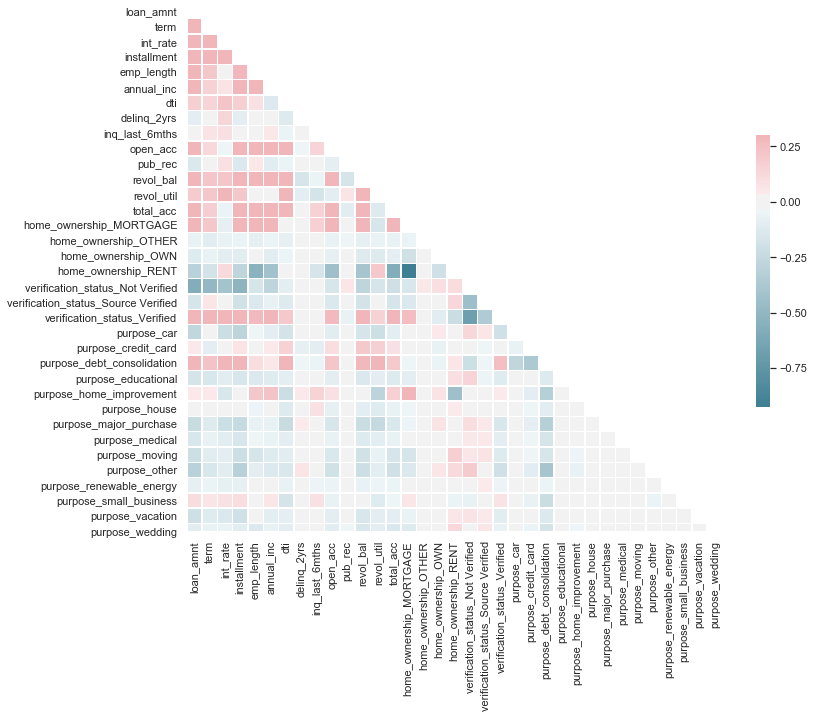

In [95]:
plot_correlation_heatmap( correlations_matrix )


### > Option 1 (DVT):

In [96]:
loans_opt_1_dvt.shape

(37646, 33)

In [97]:
cols = loans_opt_1_dvt.columns

corr_cols = cols.drop("loan_status")

print( len(corr_cols) )


32


In [98]:
correlations_matrix = loans_opt_1_dvt[corr_cols].corr()

print( correlations_matrix.shape )


(32, 32)


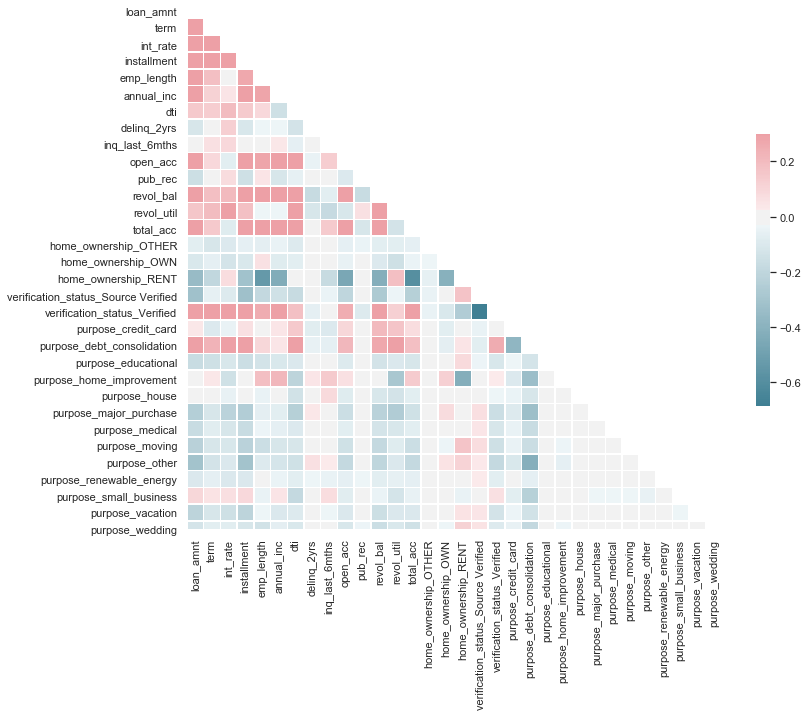

In [99]:
plot_correlation_heatmap( correlations_matrix )


In [100]:
correlations_matrix['home_ownership_RENT'].sort_values()

total_acc                             -0.310182
home_ownership_OWN                    -0.271520
emp_length                            -0.257012
purpose_home_improvement              -0.222102
revol_bal                             -0.195920
open_acc                              -0.191609
annual_inc                            -0.173374
loan_amnt                             -0.153937
installment                           -0.119877
term                                  -0.092915
verification_status_Verified          -0.083497
inq_last_6mths                        -0.082132
home_ownership_OTHER                  -0.048920
pub_rec                               -0.026585
purpose_small_business                -0.024782
delinq_2yrs                           -0.020129
purpose_renewable_energy              -0.010871
purpose_major_purchase                -0.005858
purpose_medical                       -0.003249
purpose_house                          0.013356
purpose_vacation                       0

In [101]:
correlations_matrix['verification_status_Verified'].sort_values()

verification_status_Source Verified   -0.395123
home_ownership_RENT                   -0.083497
purpose_other                         -0.055264
purpose_major_purchase                -0.039119
home_ownership_OWN                    -0.036348
purpose_moving                        -0.023598
purpose_educational                   -0.022882
purpose_medical                       -0.019819
purpose_vacation                      -0.018568
purpose_wedding                       -0.011330
pub_rec                               -0.008903
purpose_renewable_energy              -0.005281
purpose_credit_card                    0.000892
delinq_2yrs                            0.003005
home_ownership_OTHER                   0.006144
purpose_house                          0.007798
purpose_home_improvement               0.012943
inq_last_6mths                         0.015760
purpose_small_business                 0.031662
revol_util                             0.049692
purpose_debt_consolidation             0

### Selecting an Error Metric

An error metric will help us figure out when our model is performing well, and when it's performing poorly. Since we will be using a machine learning model to predict whether or not we should fund a loan on the Lending Club platform, our final goal is to make money. 

- We want to fund enough loans that are paid off on time to compensate for our losses from loans that aren't paid off.

An error metric will help us determine if our algorithm will make us money or lose us money.

In this case, we're primarily concerned with false positives and false negatives. Both of these are different types of misclassifications. 

- With a __false positive__, we predict that a loan will be paid off on time, but it actually isn't. This costs us money, since we fund loans that lose us money. 


- With a __false negative__, we predict that a loan won't be paid off on time, but it actually would be paid off on time. This loses us potential money, since we didn't fund a loan that actually would have been paid off.

Since we're viewing this problem from the standpoint of a __conservative investor__, we need to treat false positives differently than false negatives. __A conservative investor would want to minimize risk and avoid false positives as much as possible.__ We would be more secure with missing out on opportunities (false negatives) than we would be with funding a risky loan (false positives).

We mentioned earlier that there is a significant __class imbalance__ in the `loan_status` column. There are __6 times__ as many loans that were paid off on time (`1`), than loans that weren't paid off on time (`0`). This causes a major issue when we use __accuracy__ as a metric. Due to the class imbalance, a classifier can predict 1 for every row, and still have high accuracy.

- Accuracy = number of correct predictions divided by the number of total predictions

In this case, we will not use accuracy and instead will use metrics that tell us the number of false positives and false negatives.

This means that we should optimize for:

- __High__ True Positive Rate (TPR) -- aka Sensitivity or Recall

    * The percentage of loans that should be funded that I would fund


- __Low__ False Positive Rate (FPR) -- aka Fall-Out

    * The percentage of the loans that shouldn't be funded that I would fund

### Logistic Regression

A good first algorithm to apply to binary classification problems is logistic regression, for the following reasons:

- it's quick to train and we can iterate more quickly,


- it's less prone to overfitting than more complex models like decision trees,


- it's easy to interpret.

In [101]:
loans_opt_1_dvt.shape

(37646, 33)

In [102]:
cols = loans_opt_1_dvt.columns

train_cols = cols.drop("loan_status")

print( len(train_cols) )


32


In [103]:
features = loans_opt_1_dvt[train_cols]

target = loans_opt_1_dvt["loan_status"]


In [104]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr


LogisticRegression()

In [105]:
from sklearn import get_config

get_config()


{'assume_finite': False,
 'working_memory': 1024,
 'print_changed_only': True,
 'display': 'text'}

In [106]:
from sklearn import set_config

set_config( print_changed_only=False )


In [107]:
get_config()

{'assume_finite': False,
 'working_memory': 1024,
 'print_changed_only': False,
 'display': 'text'}

In [108]:
lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### > 3 Folds (k-fold cross validation)

In [109]:
from sklearn.model_selection import cross_val_predict

predictions = cross_val_predict( lr, features, target, cv=3 )


print( type(predictions) )
print( predictions.size )


C:\Users\helen\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\helen\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

<class 'numpy.ndarray'>
37646


C:\Users\helen\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [110]:
lr = LogisticRegression( solver='liblinear' )

lr


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [111]:
predictions = cross_val_predict( lr, features, target, cv=3 )


print( type(predictions) )
print( predictions.size )


<class 'numpy.ndarray'>
37646


In [112]:
predictions = pd.Series( predictions, index=loans_opt_1_dvt.index )

predictions.shape


(37646,)

### *** Functions:

In [113]:
def compute_confusion_matrix( df, predictions, target ):
    
    # False positives.
    fp_filter = (predictions == 1) & (df[target] == 0)

    fp = len(predictions[fp_filter])

    print("> False Positives:", fp, "\n")


    # True positives.
    tp_filter = (predictions == 1) & (df[target] == 1)

    tp = len(predictions[tp_filter])

    print("> True Positives:", tp, "\n")


    # False negatives.
    fn_filter = (predictions == 0) & (df[target] == 1)

    fn = len(predictions[fn_filter])

    print("> False Negatives:", fn, "\n")


    # True negatives
    tn_filter = (predictions == 0) & (df[target] == 0)

    tn = len(predictions[tn_filter])

    print("> True Negatives:", tn, "\n")
    
    
    return tp, tn, fp, fn



In [114]:
def compute_tpr( tp, fn ):
    
    # Rates
    tpr = tp / (tp + fn)

    print("True Positive Rate:", tpr, "\n")



In [115]:
def compute_fpr( fp, tn ):
    
    fpr = fp / (fp + tn)

    print("False Positive Rate:", fpr, "\n")



In [116]:
def compute_precision( tp, fp ):
    
    precision = tp / (tp + fp)

    print("Precision:", precision, "\n")



In [117]:
tp, tn, fp, fn = compute_confusion_matrix( loans_opt_1_dvt, predictions, "loan_status" )


> False Positives: 5347 

> True Positives: 32166 

> False Negatives: 91 

> True Negatives: 42 



In [118]:
compute_tpr( tp, fn )

compute_fpr( fp, tn )

compute_precision( tp, fp )


True Positive Rate: 0.9971789069039279 

False Positive Rate: 0.9922063462609019 

Precision: 0.8574627462479674 



Currently, the classifier is not accounting for the imbalance in the classes.

Next, Let's tell the classifier to penalize misclassifications of the less prevalent class more than the other class.

### Penalizing the Classifier

#### > `class_weight` = `balanced`

By setting the `class_weight` parameter to `balanced` (when creating the LogisticRegression instance) we are telling scikit-learn to penalize the misclassification of the minority class during the training process. The penalty means that the logistic regression classifier pays more attention to correctly classifying rows where `loan_status` is `0`. This lowers accuracy when `loan_status` is `1`, but increases accuracy when `loan_status` is `0`.

__The penalty is set to be inversely proportional to the class frequencies.__ This would mean that for the classifier, correctly classifying a row where `loan_status` is `0` is __6 times__ more important than correctly classifying a row where `loan_status` is `1`.

In [119]:
lr = LogisticRegression( solver='liblinear', class_weight="balanced" )


predictions = cross_val_predict( lr, features, target, cv=3 )


predictions = pd.Series( predictions, index=loans_opt_1_dvt.index )

predictions.shape


(37646,)

In [120]:
tp, tn, fp, fn = compute_confusion_matrix( loans_opt_1_dvt, predictions, "loan_status" )


> False Positives: 1881 

> True Positives: 20362 

> False Negatives: 11895 

> True Negatives: 3508 



In [121]:
compute_tpr( tp, fn )

compute_fpr( fp, tn )

compute_precision( tp, fp )


True Positive Rate: 0.6312428310134235 

False Positive Rate: 0.34904434960103914 

Precision: 0.9154340691453491 



### Number of Folds (cross validation) = 5

In [122]:
lr = LogisticRegression( solver='liblinear', class_weight="balanced" )


predictions = cross_val_predict( lr, features, target, cv=5 )


predictions = pd.Series( predictions, index=loans_opt_1_dvt.index )

predictions.shape


(37646,)

In [123]:
tp, tn, fp, fn = compute_confusion_matrix( loans_opt_1_dvt, predictions, "loan_status" )


> False Positives: 1873 

> True Positives: 20169 

> False Negatives: 12088 

> True Negatives: 3516 



In [124]:
compute_tpr( tp, fn )

compute_fpr( fp, tn )

compute_precision( tp, fp )


True Positive Rate: 0.6252596335679077 

False Positive Rate: 0.3475598441269252 

Precision: 0.9150258597223483 



### Number of Folds (cross validation) = 10

In [125]:
lr = LogisticRegression( solver='liblinear', class_weight="balanced" )


predictions = cross_val_predict( lr, features, target, cv=10 )


predictions = pd.Series( predictions, index=loans_opt_1_dvt.index )

predictions.shape


(37646,)

In [126]:
tp, tn, fp, fn = compute_confusion_matrix( loans_opt_1_dvt, predictions, "loan_status" )


> False Positives: 1895 

> True Positives: 20384 

> False Negatives: 11873 

> True Negatives: 3494 



In [127]:
compute_tpr( tp, fn )

compute_fpr( fp, tn )

compute_precision( tp, fp )


True Positive Rate: 0.6319248535201661 

False Positive Rate: 0.35164223418073853 

Precision: 0.914942322366354 



### solver = 'lbfgs'

In [128]:
lr = LogisticRegression( class_weight="balanced" )


predictions = cross_val_predict( lr, features, target, cv=10 )


predictions = pd.Series( predictions, index=loans_opt_1_dvt.index )

predictions.shape


C:\Users\helen\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\helen\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

(37646,)

In [129]:
lr

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [130]:
tp, tn, fp, fn = compute_confusion_matrix( loans_opt_1_dvt, predictions, "loan_status" )


> False Positives: 1855 

> True Positives: 17222 

> False Negatives: 15035 

> True Negatives: 3534 



In [131]:
compute_tpr( tp, fn )

compute_fpr( fp, tn )

compute_precision( tp, fp )


True Positive Rate: 0.5338996186874166 

False Positive Rate: 0.34421970681016884 

Precision: 0.902762488860932 



The `liblinear` solver (algorithm to use in the optimization problem) performs/responds better than the `lbfgs`.

#### > `class_weight` = Harsher Penalty

We can try to lower the false positive rate (FPR) further by assigning a harsher (higher) penalty for misclassifying the negative class.

#### Penalty = 7:

In [138]:
penalty = {
    0: 7,
    1: 1
}


lr = LogisticRegression( solver='liblinear', class_weight=penalty )


predictions = cross_val_predict( lr, features, target, cv=10 )


predictions = pd.Series( predictions, index=loans_opt_1_dvt.index )

predictions.shape


(37646,)

In [139]:
tp, tn, fp, fn = compute_confusion_matrix( loans_opt_1_dvt, predictions, "loan_status" )


> False Positives: 1537 

> True Positives: 18349 

> False Negatives: 13908 

> True Negatives: 3852 



In [140]:
compute_tpr( tp, fn )

compute_fpr( fp, tn )

compute_precision( tp, fp )


True Positive Rate: 0.5688377716464643 

False Positive Rate: 0.2852106142141399 

Precision: 0.92270944382983 



#### Penalty = 8:

In [141]:
penalty = {
    0: 8,
    1: 1
}


lr = LogisticRegression( solver='liblinear', class_weight=penalty )


predictions = cross_val_predict( lr, features, target, cv=10 )


predictions = pd.Series( predictions, index=loans_opt_1_dvt.index )

predictions.shape


(37646,)

In [142]:
tp, tn, fp, fn = compute_confusion_matrix( loans_opt_1_dvt, predictions, "loan_status" )


> False Positives: 1008 

> True Positives: 13148 

> False Negatives: 19109 

> True Negatives: 4381 



In [143]:
compute_tpr( tp, fn )

compute_fpr( fp, tn )

compute_precision( tp, fp )


True Positive Rate: 0.40760145084787797 

False Positive Rate: 0.18704768973835592 

Precision: 0.9287934444758407 



#### Penalty = 9:

In [144]:
penalty = {
    0: 9,
    1: 1
}


lr = LogisticRegression( solver='liblinear', class_weight=penalty )


predictions = cross_val_predict( lr, features, target, cv=10 )


predictions = pd.Series( predictions, index=loans_opt_1_dvt.index )

predictions.shape


(37646,)

In [145]:
tp, tn, fp, fn = compute_confusion_matrix( loans_opt_1_dvt, predictions, "loan_status" )


> False Positives: 751 

> True Positives: 10854 

> False Negatives: 21403 

> True Negatives: 4638 



In [146]:
compute_tpr( tp, fn )

compute_fpr( fp, tn )

compute_precision( tp, fp )


True Positive Rate: 0.3364851040084323 

False Positive Rate: 0.13935795138244572 

Precision: 0.9352865144334339 



#### Penalty = 10:

In [147]:
penalty = {
    0: 10,
    1: 1
}


lr = LogisticRegression( solver='liblinear', class_weight=penalty )


predictions = cross_val_predict( lr, features, target, cv=10 )


predictions = pd.Series( predictions, index=loans_opt_1_dvt.index )

predictions.shape


(37646,)

In [148]:
tp, tn, fp, fn = compute_confusion_matrix( loans_opt_1_dvt, predictions, "loan_status" )


> False Positives: 526 

> True Positives: 8796 

> False Negatives: 23461 

> True Negatives: 4863 



In [149]:
compute_tpr( tp, fn )

compute_fpr( fp, tn )

compute_precision( tp, fp )


True Positive Rate: 0.272684998604954 

False Positive Rate: 0.09760623492299128 

Precision: 0.9435743402703283 



#### Penalty = 11:

In [150]:
penalty = {
    0: 11,
    1: 1
}


lr = LogisticRegression( solver='liblinear', class_weight=penalty )


predictions = cross_val_predict( lr, features, target, cv=10 )


predictions = pd.Series( predictions, index=loans_opt_1_dvt.index )

predictions.shape


(37646,)

In [151]:
tp, tn, fp, fn = compute_confusion_matrix( loans_opt_1_dvt, predictions, "loan_status" )


> False Positives: 394 

> True Positives: 7095 

> False Negatives: 25162 

> True Negatives: 4995 



In [152]:
compute_tpr( tp, fn )

compute_fpr( fp, tn )

compute_precision( tp, fp )


True Positive Rate: 0.219952258424528 

False Positive Rate: 0.07311189460011133 

Precision: 0.9473895046067565 



#### Penalty = 12:

In [153]:
penalty = {
    0: 12,
    1: 1
}


lr = LogisticRegression( solver='liblinear', class_weight=penalty )


predictions = cross_val_predict( lr, features, target, cv=10 )


predictions = pd.Series( predictions, index=loans_opt_1_dvt.index )

predictions.shape


(37646,)

In [154]:
tp, tn, fp, fn = compute_confusion_matrix( loans_opt_1_dvt, predictions, "loan_status" )


> False Positives: 244 

> True Positives: 5105 

> False Negatives: 27152 

> True Negatives: 5145 



In [155]:
compute_tpr( tp, fn )

compute_fpr( fp, tn )

compute_precision( tp, fp )


True Positive Rate: 0.15826022258734537 

False Positive Rate: 0.04527741696047504 

Precision: 0.9543839970087867 



#### Penalty = 15:

In [156]:
penalty = {
    0: 15,
    1: 1
}


lr = LogisticRegression( solver='liblinear', class_weight=penalty )


predictions = cross_val_predict( lr, features, target, cv=10 )


predictions = pd.Series( predictions, index=loans_opt_1_dvt.index )

predictions.shape


(37646,)

In [157]:
tp, tn, fp, fn = compute_confusion_matrix( loans_opt_1_dvt, predictions, "loan_status" )


> False Positives: 61 

> True Positives: 1224 

> False Negatives: 31033 

> True Negatives: 5328 



In [158]:
compute_tpr( tp, fn )

compute_fpr( fp, tn )

compute_precision( tp, fp )


True Positive Rate: 0.03794525219332238 

False Positive Rate: 0.01131935424011876 

Precision: 0.9525291828793774 



### Summary of the above results:
- Logistic Regression model
- solver = 'liblinear'
- K-Fold Cross Validation, k = 10

|     Penalty     | TPR (Recall) % | FPR (Fall-out) % | Precision % |
|:---------------:|:--------------:|:----------------:|:-----------:|
| Balanced (5.89) |      63.20     |       35.16      |    91.50    |
|        7        |      56.88     |       28.52      |    92.27    |
|        8        |      40.76     |       18.70      |    92.88    |
|        9        |      33.65     |       13.93      |    93.53    |
|        10       |      27.27     |       9.76       |    94.36    |
|        11       |       22       |       7.31       |    94.74    |
|        12       |      15.82     |       4.53       |    95.44    |
|        15       |      3.79      |       1.13       |    95.25    |

We can see that assigning manual penalties lowered the false positive rate, and thus lowered our risk. Note that this comes at the expense of true positive rate. While we have fewer false positives, we're also missing opportunities to fund more loans and potentially make more money. Given that we're approaching this as a conservative investor, this strategy makes sense, but it's worth keeping in mind the tradeoffs.

### Random Forests

Let's try a more complex algorithm, random forest. Random forests are able to work with nonlinear data and learn complex conditionals. Logistic regressions are only able to work with linear data. Training a random forest algorithm may enable more accuracy due to columns that correlate nonlinearly with `loan_status`.

#### > `class_weight` = `balanced`

In [159]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier( n_estimators=100, random_state=1, class_weight="balanced" )


predictions = cross_val_predict( rf, features, target, cv=10 )


predictions = pd.Series( predictions, index=loans_opt_1_dvt.index )


print(rf)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)


In [160]:
tp, tn, fp, fn = compute_confusion_matrix( loans_opt_1_dvt, predictions, "loan_status" )


> False Positives: 5350 

> True Positives: 32212 

> False Negatives: 45 

> True Negatives: 39 



In [161]:
compute_tpr( tp, fn )

compute_fpr( fp, tn )

compute_precision( tp, fp )


True Positive Rate: 0.9986049539634808 

False Positive Rate: 0.9927630358136945 

Precision: 0.8575688195516745 



#### Parameters' Tweaking:

_min_samples_leaf_ (default=1) = 5

_min_samples_split_ (default=2) = 5

In [162]:
rf = RandomForestClassifier( n_estimators=100, random_state=1, class_weight="balanced", \
                               min_samples_leaf=5, min_samples_split=5 )


predictions = cross_val_predict( rf, features, target, cv=10 )


predictions = pd.Series( predictions, index=loans_opt_1_dvt.index )


print(rf)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)


In [163]:
tp, tn, fp, fn = compute_confusion_matrix( loans_opt_1_dvt, predictions, "loan_status" )


> False Positives: 4303 

> True Positives: 30168 

> False Negatives: 2089 

> True Negatives: 1086 



In [164]:
compute_tpr( tp, fn )

compute_fpr( fp, tn )

compute_precision( tp, fp )


True Positive Rate: 0.9352388628824752 

False Positive Rate: 0.7984783818890332 

Precision: 0.8751704331176932 



#### Parameters' Tweaking:

_max_depth_ (default=None) = 15

In [165]:
rf = RandomForestClassifier( n_estimators=100, random_state=1, class_weight="balanced", \
                               min_samples_leaf=5, min_samples_split=5, max_depth=15 )


predictions = cross_val_predict( rf, features, target, cv=10 )


predictions = pd.Series( predictions, index=loans_opt_1_dvt.index )


print(rf)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)


In [166]:
tp, tn, fp, fn = compute_confusion_matrix( loans_opt_1_dvt, predictions, "loan_status" )


> False Positives: 3562 

> True Positives: 27973 

> False Negatives: 4284 

> True Negatives: 1827 



In [167]:
compute_tpr( tp, fn )

compute_fpr( fp, tn )

compute_precision( tp, fp )


True Positive Rate: 0.8671916173233717 

False Positive Rate: 0.6609760623492299 

Precision: 0.8870461392104011 



#### > `n_estimators` = `10`

In [168]:
rf = RandomForestClassifier( n_estimators=10, random_state=1, class_weight="balanced" )


predictions = cross_val_predict( rf, features, target, cv=10 )


predictions = pd.Series( predictions, index=loans_opt_1_dvt.index )


print(rf)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)


In [169]:
tp, tn, fp, fn = compute_confusion_matrix( loans_opt_1_dvt, predictions, "loan_status" )


> False Positives: 5040 

> True Positives: 31395 

> False Negatives: 862 

> True Negatives: 349 



In [170]:
compute_tpr( tp, fn )

compute_fpr( fp, tn )

compute_precision( tp, fp )


True Positive Rate: 0.9732771181448988 

False Positive Rate: 0.9352384486917795 

Precision: 0.861671469740634 



#### Parameters' Tweaking:

_min_samples_leaf_ = 5

_min_samples_split_ = 5

_max_depth_ = 15

In [171]:
rf = RandomForestClassifier( n_estimators=10, random_state=1, class_weight="balanced", \
                               min_samples_leaf=5, min_samples_split=5, max_depth=15 )


predictions = cross_val_predict( rf, features, target, cv=10 )


predictions = pd.Series( predictions, index=loans_opt_1_dvt.index )


print(rf)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)


In [172]:
tp, tn, fp, fn = compute_confusion_matrix( loans_opt_1_dvt, predictions, "loan_status" )


> False Positives: 3437 

> True Positives: 26873 

> False Negatives: 5384 

> True Negatives: 1952 



In [173]:
compute_tpr( tp, fn )

compute_fpr( fp, tn )

compute_precision( tp, fp )


True Positive Rate: 0.8330904919862355 

False Positive Rate: 0.6377806643161996 

Precision: 0.8866050808314088 



#### > `class_weight` = Harsher Penalty

#### Penalty = 10:

In [174]:
penalty = {
    0: 10,
    1: 1
}


rf = RandomForestClassifier( n_estimators=10, random_state=1, class_weight=penalty )


predictions = cross_val_predict( rf, features, target, cv=10 )


predictions = pd.Series( predictions, index=loans_opt_1_dvt.index )


print(rf)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 10, 1: 1}, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=None, oob_score=False,
                       random_state=1, verbose=0, warm_start=False)


In [175]:
tp, tn, fp, fn = compute_confusion_matrix( loans_opt_1_dvt, predictions, "loan_status" )


> False Positives: 5025 

> True Positives: 31391 

> False Negatives: 866 

> True Negatives: 364 



In [176]:
compute_tpr( tp, fn )

compute_fpr( fp, tn )

compute_precision( tp, fp )


True Positive Rate: 0.9731531140527637 

False Positive Rate: 0.932455000927816 

Precision: 0.8620112038664324 



#### Parameters' Tweaking:

_min_samples_leaf_ = 5

_min_samples_split_ = 5

_max_depth_ = 15

In [177]:
penalty = {
    0: 10,
    1: 1
}


rf = RandomForestClassifier( n_estimators=10, random_state=1, class_weight=penalty, \
                               min_samples_leaf=5, min_samples_split=5, max_depth=15 )


predictions = cross_val_predict( rf, features, target, cv=10 )


predictions = pd.Series( predictions, index=loans_opt_1_dvt.index )


print(rf)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 10, 1: 1}, criterion='gini',
                       max_depth=15, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=5,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=None, oob_score=False,
                       random_state=1, verbose=0, warm_start=False)


In [178]:
tp, tn, fp, fn = compute_confusion_matrix( loans_opt_1_dvt, predictions, "loan_status" )


> False Positives: 2517 

> True Positives: 22246 

> False Negatives: 10011 

> True Negatives: 2872 



In [179]:
compute_tpr( tp, fn )

compute_fpr( fp, tn )

compute_precision( tp, fp )


True Positive Rate: 0.6896487584090275 

False Positive Rate: 0.46706253479309706 

Precision: 0.8983564188507047 



#### Parameters' Tweaking:

_min_samples_leaf_ = __10__

_min_samples_split_ = 5

_max_depth_ = 15

In [180]:
penalty = {
    0: 10,
    1: 1
}


rf = RandomForestClassifier( n_estimators=10, random_state=1, class_weight=penalty, \
                               min_samples_leaf=10, min_samples_split=5, max_depth=15 )


predictions = cross_val_predict( rf, features, target, cv=10 )


predictions = pd.Series( predictions, index=loans_opt_1_dvt.index )


print(rf)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 10, 1: 1}, criterion='gini',
                       max_depth=15, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=10,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=None, oob_score=False,
                       random_state=1, verbose=0, warm_start=False)


In [181]:
tp, tn, fp, fn = compute_confusion_matrix( loans_opt_1_dvt, predictions, "loan_status" )


> False Positives: 2107 

> True Positives: 20338 

> False Negatives: 11919 

> True Negatives: 3282 



In [182]:
compute_tpr( tp, fn )

compute_fpr( fp, tn )

compute_precision( tp, fp )


True Positive Rate: 0.6304988064606132 

False Positive Rate: 0.3909816292447578 

Precision: 0.9061260859879706 



#### Parameters' Tweaking:

_min_samples_leaf_ = 10

_min_samples_split_ = __10__

_max_depth_ = 15

Outcome: no improvement

In [183]:
penalty = {
    0: 10,
    1: 1
}


rf = RandomForestClassifier( n_estimators=10, random_state=1, class_weight=penalty, \
                               min_samples_leaf=10, min_samples_split=10, max_depth=15 )


predictions = cross_val_predict( rf, features, target, cv=10 )


predictions = pd.Series( predictions, index=loans_opt_1_dvt.index )


print(rf)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 10, 1: 1}, criterion='gini',
                       max_depth=15, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=10,
                       min_samples_split=10, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=None, oob_score=False,
                       random_state=1, verbose=0, warm_start=False)


In [184]:
tp, tn, fp, fn = compute_confusion_matrix( loans_opt_1_dvt, predictions, "loan_status" )


> False Positives: 2107 

> True Positives: 20338 

> False Negatives: 11919 

> True Negatives: 3282 



In [185]:
compute_tpr( tp, fn )

compute_fpr( fp, tn )

compute_precision( tp, fp )


True Positive Rate: 0.6304988064606132 

False Positive Rate: 0.3909816292447578 

Precision: 0.9061260859879706 



#### Parameters' Tweaking:

_min_samples_leaf_ = __15__

_min_samples_split_ = 5

_max_depth_ = 15

In [186]:
penalty = {
    0: 10,
    1: 1
}


rf = RandomForestClassifier( n_estimators=10, random_state=1, class_weight=penalty, \
                               min_samples_leaf=15, min_samples_split=5, max_depth=15 )


predictions = cross_val_predict( rf, features, target, cv=10 )


predictions = pd.Series( predictions, index=loans_opt_1_dvt.index )


print(rf)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 10, 1: 1}, criterion='gini',
                       max_depth=15, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=15,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=None, oob_score=False,
                       random_state=1, verbose=0, warm_start=False)


In [187]:
tp, tn, fp, fn = compute_confusion_matrix( loans_opt_1_dvt, predictions, "loan_status" )


> False Positives: 1765 

> True Positives: 18666 

> False Negatives: 13591 

> True Negatives: 3624 



In [188]:
compute_tpr( tp, fn )

compute_fpr( fp, tn )

compute_precision( tp, fp )


True Positive Rate: 0.5786650959481663 

False Positive Rate: 0.32751902022638707 

Precision: 0.9136116685429005 



#### Parameters' Tweaking:

_min_samples_leaf_ = 15

_min_samples_split_ = 5

_max_depth_ = __10__

In [189]:
penalty = {
    0: 10,
    1: 1
}


rf = RandomForestClassifier( n_estimators=10, random_state=1, class_weight=penalty, \
                               min_samples_leaf=15, min_samples_split=5, max_depth=10 )


predictions = cross_val_predict( rf, features, target, cv=10 )


predictions = pd.Series( predictions, index=loans_opt_1_dvt.index )


print(rf)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 10, 1: 1}, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=15,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=None, oob_score=False,
                       random_state=1, verbose=0, warm_start=False)


In [190]:
tp, tn, fp, fn = compute_confusion_matrix( loans_opt_1_dvt, predictions, "loan_status" )


> False Positives: 1114 

> True Positives: 14130 

> False Negatives: 18127 

> True Negatives: 4275 



In [191]:
compute_tpr( tp, fn )

compute_fpr( fp, tn )

compute_precision( tp, fp )


True Positive Rate: 0.4380444554670304 

False Positive Rate: 0.20671738727036557 

Precision: 0.9269220676987667 



#### Parameters' Tweaking:

_min_samples_leaf_ = 15

_min_samples_split_ = 5

_max_depth_ = __5__

In [192]:
penalty = {
    0: 10,
    1: 1
}


rf = RandomForestClassifier( n_estimators=10, random_state=1, class_weight=penalty, \
                               min_samples_leaf=15, min_samples_split=5, max_depth=5 )


predictions = cross_val_predict( rf, features, target, cv=10 )


predictions = pd.Series( predictions, index=loans_opt_1_dvt.index )


print(rf)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 10, 1: 1}, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=15,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=None, oob_score=False,
                       random_state=1, verbose=0, warm_start=False)


In [193]:
tp, tn, fp, fn = compute_confusion_matrix( loans_opt_1_dvt, predictions, "loan_status" )


> False Positives: 433 

> True Positives: 8059 

> False Negatives: 24198 

> True Negatives: 4956 



In [194]:
compute_tpr( tp, fn )

compute_fpr( fp, tn )

compute_precision( tp, fp )


True Positive Rate: 0.24983724462907275 

False Positive Rate: 0.08034885878641677 

Precision: 0.9490108337258596 



#### Penalty = 15:

In [195]:
penalty = {
    0: 15,
    1: 1
}


rf = RandomForestClassifier( n_estimators=10, random_state=1, class_weight=penalty )


predictions = cross_val_predict( rf, features, target, cv=10 )


predictions = pd.Series( predictions, index=loans_opt_1_dvt.index )


print(rf)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 15, 1: 1}, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=None, oob_score=False,
                       random_state=1, verbose=0, warm_start=False)


In [196]:
tp, tn, fp, fn = compute_confusion_matrix( loans_opt_1_dvt, predictions, "loan_status" )


> False Positives: 5048 

> True Positives: 31445 

> False Negatives: 812 

> True Negatives: 341 



In [197]:
compute_tpr( tp, fn )

compute_fpr( fp, tn )

compute_precision( tp, fp )


True Positive Rate: 0.9748271692965867 

False Positive Rate: 0.9367229541658935 

Precision: 0.8616721014989176 



#### Parameters' Tweaking:

_min_samples_leaf_ = 15

_min_samples_split_ = 5

_max_depth_ = 5

In [198]:
penalty = {
    0: 15,
    1: 1
}


rf = RandomForestClassifier( n_estimators=10, random_state=1, class_weight=penalty, \
                               min_samples_leaf=15, min_samples_split=5, max_depth=5 )


predictions = cross_val_predict( rf, features, target, cv=10 )


predictions = pd.Series( predictions, index=loans_opt_1_dvt.index )


print(rf)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 15, 1: 1}, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=15,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=None, oob_score=False,
                       random_state=1, verbose=0, warm_start=False)


In [199]:
tp, tn, fp, fn = compute_confusion_matrix( loans_opt_1_dvt, predictions, "loan_status" )


> False Positives: 90 

> True Positives: 2793 

> False Negatives: 29464 

> True Negatives: 5299 



In [200]:
compute_tpr( tp, fn )

compute_fpr( fp, tn )

compute_precision( tp, fp )


True Positive Rate: 0.086585857333292 

False Positive Rate: 0.01670068658378178 

Precision: 0.9687825182101977 



### Important Note (conclusion):

Overall, the random forest model does not perform better than the logistic regression one.

## Under-sampling

In [201]:
loans_opt_1_dvt['loan_status'].value_counts(dropna=False)

1    32257
0     5389
Name: loan_status, dtype: int64

In [202]:
paid_loans_bool = loans_opt_1_dvt['loan_status'] == 1

paid_loans = loans_opt_1_dvt[paid_loans_bool].copy()

paid_loans.shape


(32257, 33)

In [203]:
non_paid_loans_bool = loans_opt_1_dvt['loan_status'] == 0

non_paid_loans = loans_opt_1_dvt[non_paid_loans_bool].copy()

non_paid_loans.shape


(5389, 33)

In [204]:
paid_loans_sample = paid_loans.sample( non_paid_loans.shape[0], random_state=1 )

paid_loans_sample.shape


(5389, 33)

In [205]:
paid_loans_sample.head()

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
12842,12000.0,36,10.99,392.81,6.0,72000.0,1,2.97,0.0,0.0,4.0,0.0,6375.0,35.4,9.0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
14952,22000.0,60,13.49,506.11,5.0,150000.0,1,12.14,0.0,0.0,14.0,0.0,38064.0,59.0,36.0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9698,32500.0,36,9.99,911.42,6.0,65000.0,1,19.51,0.0,0.0,8.0,0.0,2524.0,18.7,28.0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
28788,10000.0,36,13.61,339.89,10.0,91000.0,1,15.93,0.0,0.0,10.0,0.0,10116.0,88.6,28.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
23326,4500.0,60,12.61,101.50,7.0,40000.0,1,23.25,0.0,2.0,8.0,1.0,4109.0,32.9,22.0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [206]:
under_sampling_df = pd.concat( [paid_loans_sample, non_paid_loans], axis=0 )

under_sampling_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10778 entries, 12842 to 39747
Data columns (total 33 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   loan_amnt                            10778 non-null  float64
 1   term                                 10778 non-null  int64  
 2   int_rate                             10778 non-null  float64
 3   installment                          10778 non-null  float64
 4   emp_length                           10778 non-null  float64
 5   annual_inc                           10778 non-null  float64
 6   loan_status                          10778 non-null  int64  
 7   dti                                  10778 non-null  float64
 8   delinq_2yrs                          10778 non-null  float64
 9   inq_last_6mths                       10778 non-null  float64
 10  open_acc                             10778 non-null  float64
 11  pub_rec                 

In [207]:
under_sampling_df['loan_status'].value_counts(dropna=False)


1    5389
0    5389
Name: loan_status, dtype: int64

In [208]:
under_sampling_df.iloc[ 5386:5392, : ]

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
34251,11500.0,36,13.92,392.58,6.0,65000.0,1,14.88,0.0,1.0,5.0,0.0,10104.0,80.8,19.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
10577,3000.0,36,6.99,92.62,7.0,32000.0,1,16.99,0.0,1.0,12.0,0.0,10958.0,31.1,20.0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
6187,10000.0,36,12.42,334.16,10.0,34000.0,1,9.04,1.0,3.0,11.0,0.0,3377.0,42.2,29.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,2500.0,60,15.27,59.83,0.5,30000.0,0,1.00,0.0,5.0,3.0,0.0,1687.0,9.4,4.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,5600.0,60,21.28,152.39,4.0,40000.0,0,5.55,0.0,2.0,11.0,0.0,5210.0,32.6,13.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
9,5375.0,60,12.69,121.45,0.5,15000.0,0,18.08,0.0,0.0,2.0,0.0,9279.0,36.5,3.0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [209]:
under_sampling_df.head()

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
12842,12000.0,36,10.99,392.81,6.0,72000.0,1,2.97,0.0,0.0,4.0,0.0,6375.0,35.4,9.0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
14952,22000.0,60,13.49,506.11,5.0,150000.0,1,12.14,0.0,0.0,14.0,0.0,38064.0,59.0,36.0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9698,32500.0,36,9.99,911.42,6.0,65000.0,1,19.51,0.0,0.0,8.0,0.0,2524.0,18.7,28.0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
28788,10000.0,36,13.61,339.89,10.0,91000.0,1,15.93,0.0,0.0,10.0,0.0,10116.0,88.6,28.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
23326,4500.0,60,12.61,101.50,7.0,40000.0,1,23.25,0.0,2.0,8.0,1.0,4109.0,32.9,22.0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [210]:
under_sampling_df.tail()

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
39735,15450.0,36,11.22,507.46,2.0,40000.0,0,13.50,0.0,3.0,13.0,1.0,6513.0,34.3,29.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
39736,2500.0,36,12.80,84.00,0.5,32000.0,0,20.00,0.0,1.0,11.0,0.0,3408.0,35.1,32.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
39737,2500.0,36,9.64,80.26,0.5,75000.0,0,20.00,0.0,3.0,9.0,0.0,269.0,3.8,35.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
39738,6500.0,36,15.01,225.37,9.0,213000.0,0,6.45,0.0,0.0,11.0,0.0,56411.0,75.3,28.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
39747,1000.0,36,10.59,32.55,2.0,33990.0,0,14.47,0.0,1.0,9.0,0.0,4485.0,36.9,11.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


### Logistic Regression

In [211]:
cols = under_sampling_df.columns

train_cols = cols.drop("loan_status")

print( len(train_cols) )


32


In [212]:
features = under_sampling_df[train_cols]

target = under_sampling_df["loan_status"]


In [213]:
lr = LogisticRegression( solver='liblinear' )


predictions = cross_val_predict( lr, features, target, cv=10 )


predictions = pd.Series( predictions, index=under_sampling_df.index )

predictions.shape


(10778,)

In [214]:
tp, tn, fp, fn = compute_confusion_matrix( under_sampling_df, predictions, "loan_status" )

> False Positives: 1897 

> True Positives: 3145 

> False Negatives: 2244 

> True Negatives: 3492 



In [215]:
compute_tpr( tp, fn )

compute_fpr( fp, tn )

compute_precision( tp, fp )


True Positive Rate: 0.583596214511041 

False Positive Rate: 0.352013360549267 

Precision: 0.6237604125347085 



### Important Note (conclusion):
The logistic regression model that did __not__ implement _under-sampling_ (i.e. the one that was trained with a dataset of 37,646 observations) performs better than the above one (under-sampling, dataset with 10,778 observations).

- TPR (Recall): 63.20%
- FPR (Fall-out): 35.16%
- Precision: 91.50%

### solver = 'lbfgs'

In [216]:
lr = LogisticRegression( solver='lbfgs' )


predictions = cross_val_predict( lr, features, target, cv=10 )


predictions = pd.Series( predictions, index=under_sampling_df.index )

predictions.shape


C:\Users\helen\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\helen\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

(10778,)

In [217]:
tp, tn, fp, fn = compute_confusion_matrix( under_sampling_df, predictions, "loan_status" )

> False Positives: 1930 

> True Positives: 2869 

> False Negatives: 2520 

> True Negatives: 3459 



In [218]:
compute_tpr( tp, fn )

compute_fpr( fp, tn )

compute_precision( tp, fp )


True Positive Rate: 0.5323807756541102 

False Positive Rate: 0.358136945629987 

Precision: 0.5978328818503855 



Here, again, the `liblinear` solver (algorithm to use in the optimization problem) performs/responds better than the `lbfgs`.